# Setup

In [1]:
import sys
assert sys.version_info >= (3, 7)

Sklearn is the primary ML packages, sklearn version should be more than or equal to 1.0.1. This module contain some critical classes for statistical modeling.

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Other common packages, such as Numpy, pandas and matplotlib.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 14, titlesize = 14)
plt.rc("legend", fontsize = 14)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

---

## Example of regression (prediction of continuous variable)

This dataset comes from [UCI data repository](https://archive.ics.uci.edu/dataset/9/auto+mpg). There are 2 ways to import the dataset to the Python environment:
1. Download the csv data into your local disk and use pandas modules to load the data.
2. Utilize the API command available on the UCI webpage.

I will stick with the first approach. 

### Metadata
Quoted from the paper of [Quinland (1993)](https://www.sciencedirect.com/science/article/abs/pii/B978155860307350037X?via%3Dihub):
> The data concerns city-cycle fuel consumptions in miles per gallon, to be predicted in terms of 3 multivalued discrete features and 5 continuous features.

### Step 1a: Load the data and display first few rows

In [4]:
feature_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", 
                 "car_name"]
mpg_data = pd.read_csv("./dataset/uci_data/auto-mpg.data", sep = '\s+', header = None, names = feature_names)
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Step 1b: Data split (training & test) 

Before splitting the data, it is always good to call these methods: `info()` and `head()` or `tail()`.

In [5]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Let pause, step back and try to grasp the hidden message from the above outputs.
Below are some important findings:
1. The `horsepower` attribute is read as `object` data type. What does this means? This simply points to the fact that the attributes is rendered as string or mixed attributes. However, common sense tells us that `horsepower` should be numerical, where the attribute should be stored as `float64` or `int64`.
2. Car name: Based on the empirical observation on the few rows of the data, it seems like the car name is unique to each instance.

We will have test to see whether statement 2 is true during the EDA.

In [6]:
from sklearn.model_selection import train_test_split

# Identify the predictor and 
X = mpg_data.iloc[:, 1:]
y = mpg_data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)

Let print out the shape of the `X_train`, `y_train`, `X_test` and `y_test`.

In [7]:
print("The shape of X_train: ", X_train.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of X_test: ", X_test.shape)
print("The shape of y_test: ", y_test.shape)

The shape of X_train:  (318, 8)
The shape of y_train:  (318,)
The shape of X_test:  (80, 8)
The shape of y_test:  (80,)


---

## Exploratory data analysis

### Step 2a: Data exploration

When dealing with rectangular data with Python, the following are some of the common practice:
- Use `pandas.DataFrame` object methods like `describe()` and attribute like `column` to compute the statistical metrics of the numerical features and print out all the features respectively.

In [8]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'car_name'],
      dtype='object')

In [9]:
len(X_train["car_name"].unique())

256

In [10]:
X_train["car_name"].value_counts()[:50]

car_name
ford pinto                     6
toyota corolla                 4
chevrolet impala               4
amc gremlin                    4
peugeot 504                    4
chevrolet nova                 3
amc hornet                     3
amc matador                    3
chevrolet chevette             3
ford maverick                  3
chevrolet citation             3
dodge colt                     3
toyota corona                  3
plymouth fury iii              3
audi 100ls                     2
plymouth duster                2
amc matador (sw)               2
volkswagen rabbit              2
datsun 710                     2
chevrolet vega                 2
pontiac phoenix                2
honda civic                    2
ford ltd                       2
toyota mark ii                 2
chevrolet malibu               2
ford country squire (sw)       2
opel manta                     2
chevrolet caprice classic      2
honda accord                   2
ford galaxie 500               2
m

In [11]:
X_train.loc[X_train["car_name"] == "ford pinto"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,4,98.0,?,2046.0,19.0,71,1,ford pinto
112,4,122.0,85.00,2310.0,18.5,73,1,ford pinto
130,4,122.0,80.00,2451.0,16.5,74,1,ford pinto
168,4,140.0,83.00,2639.0,17.0,75,1,ford pinto
174,6,171.0,97.00,2984.0,14.5,75,1,ford pinto
206,4,140.0,72.00,2565.0,13.6,76,1,ford pinto


It seems like we have **256** different cars being included in the training dataset. The cars with the same name are different in terms of the model year and number of cylinders.

In [12]:
X_train.describe()

,cylinders,displacement,weight,acceleration,model_year,origin
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,5.402516,190.389937,2946.006289,15.617610,76.062893,1.556604
std,1.660905,101.051470,822.568690,2.738475,3.745341,0.791280
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.250000,2223.750000,14.000000,73.000000,1.000000
50%,4.000000,146.000000,2792.500000,15.500000,76.000000,1.000000
75%,6.000000,256.000000,3556.000000,17.300000,79.000000,2.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


At this stage, we know that there are a few issues pertinent to the data when it comes to the feeding it to a statistical model like linear regression:
1. Still remember the metdadata provided by the data publisher? There are *3 discrete features* and *5 continuous features*. 
2. We find the reasons on why the `horsepower` is rendered as `object`. This is because there is '?' that refers to missing values.
3. The `car_name` is not likely to be useful to the prediction task.

---

## Step 2b: Data visualization 

Before performing data visualization, lets tackle the `horsepower` data type issue. Lets apply the preprocessing on both the training and test data.

1. Map the '?' value to `NaN`.

In [13]:
X_train = X_train.applymap(lambda x: np.nan if x == '?' else x)
X_test = X_test.applymap(lambda x: np.nan if x == '?' else x)

C:\Users\User\AppData\Local\Temp/ipykernel_5140/731902495.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x: np.nan if x == '?' else x)
C:\Users\User\AppData\Local\Temp/ipykernel_5140/731902495.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_test = X_test.applymap(lambda x: np.nan if x == '?' else x)


2. Change the `horsepower` feature to `float`.

In [14]:
X_train['horsepower'] = X_train['horsepower'].astype(float)
X_test['horsepower'] = X_test['horsepower'].astype(float)

In [15]:
X_train.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,318.000000,318.000000,312.000000,318.000000,318.000000,318.000000,318.000000
mean,5.402516,190.389937,103.112179,2946.006289,15.617610,76.062893,1.556604
std,1.660905,101.051470,37.065557,822.568690,2.738475,3.745341,0.791280
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.250000,75.750000,2223.750000,14.000000,73.000000,1.000000
50%,4.000000,146.000000,92.000000,2792.500000,15.500000,76.000000,1.000000
75%,6.000000,256.000000,120.000000,3556.000000,17.300000,79.000000,2.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


When it comes to data visualization, I prefer to concatenate predictor and response into one dataframe.

In [16]:
data_train = pd.concat([X_train, y_train], axis = 1)

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 145 to 328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   horsepower    312 non-null    float64
 3   weight        318 non-null    float64
 4   acceleration  318 non-null    float64
 5   model_year    318 non-null    int64  
 6   origin        318 non-null    int64  
 7   car_name      318 non-null    object 
 8   mpg           318 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 24.8+ KB


### Distribution of discrete attributes
The distribution of number of cylinders, model years and origin.

In [18]:
data_train["cylinders"].value_counts()

cylinders
4    165
8     75
6     74
3      3
5      1
Name: count, dtype: int64

In [19]:
data_train['model_year'].value_counts()

model_year
78    32
73    30
82    27
75    26
81    24
71    24
76    24
72    23
79    23
70    23
80    22
77    21
74    19
Name: count, dtype: int64

In [20]:
data_train['origin'].value_counts()

origin
1    201
3     60
2     57
Name: count, dtype: int64

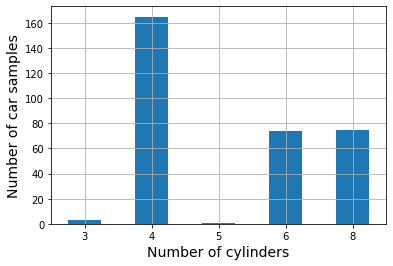

In [21]:
data_train["cylinders"].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel("Number of cylinders")
plt.ylabel("Number of car samples")
plt.show()

Most of the cars are of 4-cylinders engine.

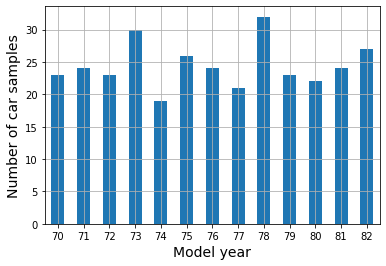

In [22]:
data_train["model_year"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Model year")
plt.ylabel("Number of car samples")
plt.show()

The samples are cars from year 1970 to 1982.

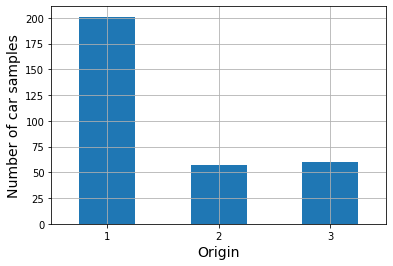

In [23]:
data_train["origin"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Origin")
plt.ylabel("Number of car samples")
plt.show()

### Distribution of continuous features

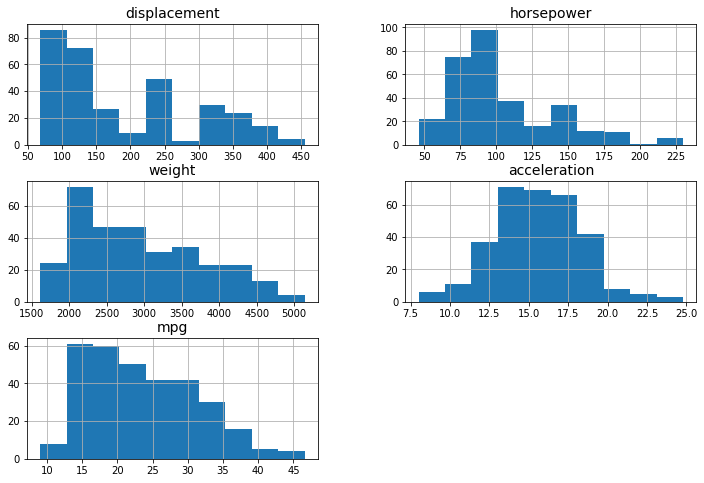

In [24]:
# distribution of individual numerical attributes
num_attrs = ["displacement", "horsepower", "weight", "acceleration", "mpg"]
data_train[num_attrs].hist(bins = 10, figsize = (12, 8))
plt.show()

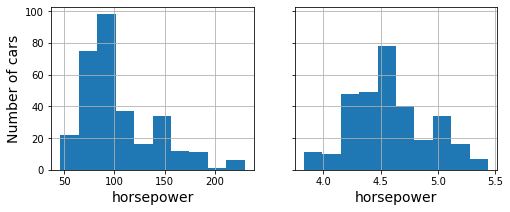

In [25]:
fig, axs = plt.subplots(1, 2, figsize = (8, 3), sharey = True)
data_train["horsepower"].hist(ax = axs[0], bins = 10)
data_train["horsepower"].apply(np.log).hist(ax = axs[1], bins = 10)
axs[0].set_xlabel("horsepower")
axs[1].set_xlabel("horsepower")
axs[0].set_ylabel("Number of cars")
plt.show()

`Model_year` and `origin` are categorical attributes. `Cylinders` is discrete quantitative (numerical) attribute. Below are the bar charts to show the distribution of discrete features.

## Looking for correlations

In [26]:
corr_matrix = data_train[num_attrs].corr()
corr_matrix

,displacement,horsepower,weight,acceleration,mpg
displacement,1.000000,0.890859,0.924141,-0.530139,-0.806144
horsepower,0.890859,1.000000,0.852075,-0.678223,-0.772374
weight,0.924141,0.852075,1.000000,-0.384668,-0.836033
acceleration,-0.530139,-0.678223,-0.384668,1.000000,0.389018
mpg,-0.806144,-0.772374,-0.836033,0.389018,1.000000


In [27]:
corr_matrix["mpg"].sort_values(ascending=False)

mpg             1.000000
acceleration    0.389018
horsepower     -0.772374
displacement   -0.806144
weight         -0.836033
Name: mpg, dtype: float64

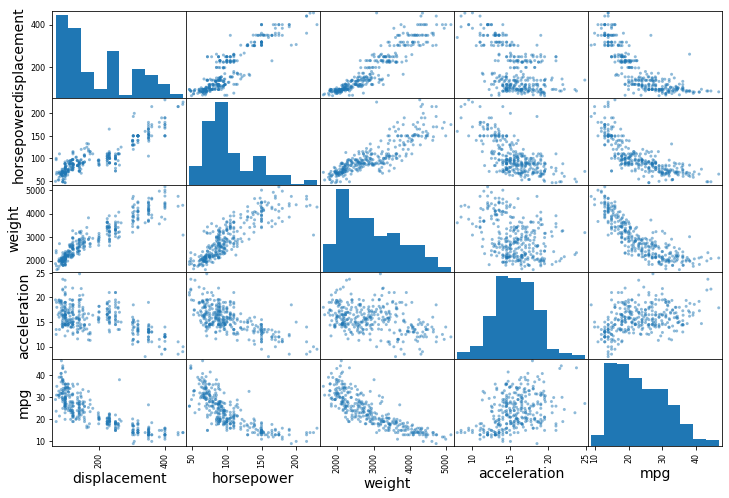

In [28]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_train[num_attrs], figsize=(12, 8))
plt.show()

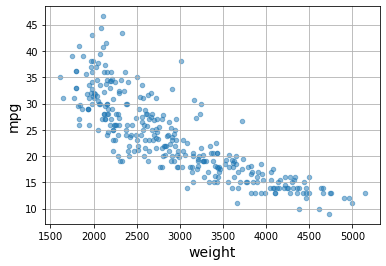

In [29]:
data_train.plot(kind = "scatter", x = "weight", y="mpg", alpha = 0.5, grid = True)
plt.show()

## Step 3: Data cleaning
### Deal with missing values on the `horsepower`

In [30]:
# Track down the missing values
null_rows_idx = X_train.isnull().any(axis = 1)
X_train.loc[null_rows_idx]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
374,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl
336,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
126,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe


In [31]:
# missing value imputation
X_train_fillna = X_train.copy()

median = X_train["horsepower"].median()
X_train_fillna["horsepower"].fillna(median, inplace=True)

X_train_fillna.loc[null_rows_idx]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,4,98.0,92.0,2046.0,19.0,71,1,ford pinto
374,4,151.0,92.0,3035.0,20.5,82,1,amc concord dl
336,4,140.0,92.0,2905.0,14.3,80,1,ford mustang cobra
354,4,100.0,92.0,2320.0,15.8,81,2,renault 18i
126,6,200.0,92.0,2875.0,17.0,74,1,ford maverick
330,4,85.0,92.0,1835.0,17.3,80,2,renault lecar deluxe


The above code snippets are just the demonstration of how median imputation. For efficiency, we will use the sklearn `impute` module.

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

## Data types conversion

Let call the `info()` method.

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 145 to 328
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   horsepower    312 non-null    float64
 3   weight        318 non-null    float64
 4   acceleration  318 non-null    float64
 5   model_year    318 non-null    int64  
 6   origin        318 non-null    int64  
 7   car_name      318 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 22.4+ KB


In [34]:
# Change the type of attributes in data frame 

X_train[["model_year", "origin", "cylinders"]] = X_train[["model_year", "origin", "cylinders"]].astype(object)
X_test[["model_year", "origin", "cylinders"]] = X_test[["model_year", "origin", "cylinders"]].astype(object)

### Discard non-informative column: `car_name`

In [35]:
X_train.drop(labels="car_name", axis=1, inplace=True)
X_test.drop(labels="car_name", axis=1, inplace=True)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 145 to 328
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    object 
 1   displacement  318 non-null    float64
 2   horsepower    312 non-null    float64
 3   weight        318 non-null    float64
 4   acceleration  318 non-null    float64
 5   model_year    318 non-null    object 
 6   origin        318 non-null    object 
dtypes: float64(4), object(3)
memory usage: 19.9+ KB


In [37]:
X_train_num = X_train.select_dtypes(include=[np.number])
X_train_num.head()

,displacement,horsepower,weight,acceleration
145,83.0,61.0,2003.0,19.0
341,173.0,110.0,2725.0,12.6
338,135.0,84.0,2490.0,15.7
73,307.0,130.0,4098.0,14.0
393,140.0,86.0,2790.0,15.6


### Handling categorical attributes

In [38]:
X_train_cat = X_train[["origin", "model_year", "cylinders"]]

In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
X_train_cat_1hot = cat_encoder.fit_transform(X_train_cat)

In [40]:
X_train_cat_1hot.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [41]:
cat_encoder.categories_

[array([1, 2, 3], dtype=object),
 array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=object),
 array([3, 4, 5, 6, 8], dtype=object)]

In [42]:
cat_encoder.feature_names_in_

array(['origin', 'model_year', 'cylinders'], dtype=object)

In [43]:
cat_encoder.get_feature_names_out()

array(['origin_1', 'origin_2', 'origin_3', 'model_year_70',
       'model_year_71', 'model_year_72', 'model_year_73', 'model_year_74',
       'model_year_75', 'model_year_76', 'model_year_77', 'model_year_78',
       'model_year_79', 'model_year_80', 'model_year_81', 'model_year_82',
       'cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8'], dtype=object)

## Python pipeline 

Data consists of numerical and categorical attributes.

In [44]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import make_pipeline

num_attr = ["displacement", "horsepower", "weight", "acceleration"]
cat_attr = ["cylinders", "model_year", "origin"]

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                            log_transformer,
                            StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                            OneHotEncoder(handle_unknown="ignore"))

In [45]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat", cat_pipeline, cat_attr)
])

In [46]:
X_train_prepared = preprocessing.fit_transform(X_train)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_spar

In [47]:
X_train_prepared.toarray()

array([[-1.34105728, -1.40422583, -1.27064562, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.07707187,  0.37306327, -0.14667782, ...,  1.        ,
         0.        ,  0.        ],
       [-0.40181628, -0.4398011 , -0.47597761, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.61557769, -1.03275769, -2.06134681, ...,  0.        ,
         0.        ,  1.        ],
       [-0.3315951 , -0.90446749, -0.36762094, ...,  1.        ,
         0.        ,  0.        ],
       [-0.2505677 , -1.12142187,  0.49664134, ...,  0.        ,
         1.        ,  0.        ]])

In [48]:
X_train_prepared.shape

(318, 25)

In [49]:
preprocessing.named_transformers_['cat']['onehotencoder'].get_feature_names_out()

array(['x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_8', 'x1_70', 'x1_71', 'x1_72',
       'x1_73', 'x1_74', 'x1_75', 'x1_76', 'x1_77', 'x1_78', 'x1_79',
       'x1_80', 'x1_81', 'x1_82', 'x2_1', 'x2_2', 'x2_3'], dtype=object)

In [50]:
fn = np.concatenate((num_attr, preprocessing.named_transformers_['cat']['onehotencoder'].get_feature_names_out()))

In [51]:
fn

array(['displacement', 'horsepower', 'weight', 'acceleration', 'x0_3',
       'x0_4', 'x0_5', 'x0_6', 'x0_8', 'x1_70', 'x1_71', 'x1_72', 'x1_73',
       'x1_74', 'x1_75', 'x1_76', 'x1_77', 'x1_78', 'x1_79', 'x1_80',
       'x1_81', 'x1_82', 'x2_1', 'x2_2', 'x2_3'], dtype=object)

In [52]:
X_train_prepared_df = pd.DataFrame(X_train_prepared.toarray(),
                                   columns=fn,
                                   index=X_train.index)
X_train_prepared_df.head(2)

,displacement,horsepower,weight,acceleration,x0_3,x0_4,x0_5,x0_6,x0_8,x1_70,...,x1_76,x1_77,x1_78,x1_79,x1_80,x1_81,x1_82,x2_1,x2_2,x2_3
145,-1.341057,-1.404226,-1.270646,1.174578,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
341,0.077072,0.373063,-0.146678,-1.102436,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Step 4: Model training with the preprocessing pipeline

### Linear regression

In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_spar

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       inverse_func=<ufunc 'exp'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cylinders', 'model_year',
                                                   'origin'])])),
                ('linearregression', LinearRegression())])

## Step 5: Evaluation

### RMSE

In [54]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(y_test, lin_reg.predict(X_test), squared=False)
lin_rmse

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_spar

2.863680965388049

### MAE

In [55]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, lin_reg.predict(X_test))
mae

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_spar

2.177945894430702

If the RMSE and MAE of less than 3 above imply that the model is ok for deployment, then we need to retrain the model for deployment. Otherwise, the followings are the follow-up actions that are possible:
1. Collect more data and include predictors relevant to the response.
2. Apply other ML regression algorithms.

# Hands-on practice
1. Plot the regression residual. Identify the potential outliers.

# Another hands-on:
1. Refer to slide 19 file "Topic 4.pptx".